## Metody Nieparametryczne w Statystyce
# Zadanie 5
Za pomocą odpowiednich symulacji zbadać odsetek odrzuceń prawdziwej hipotezy głównej (tzn. błąd I rodzaju) w teście Kołmogorowa i teście 𝜒2 w przypadku weryfikacji zgodności z rozkładem 𝑡-Studenta o różnych stopniach swobody, tzn. generować dane pochodzące z rozkładu 𝑡-Studenta o 𝑘 stopniach swobody i weryfikować hipotezę, że dane mają rozkład 𝑡-Studenta o 𝑘 st. swobody. Należy porównać wyniki klasycznego sposobu testowania i testowania z wykorzystaniem PIT (probability integral transform).
### autor: Maciej Komosa

1. Importowanie potrzebnych bibliotek

In [2]:
import numpy as np, pandas as pd
from scipy.stats import t, chisquare, kstest, uniform
import math

# wyciszenie ostrzeżeń dla testu chi kwadrat 
# który zwraca uwagę na to, że w niektórych przedziałach nie ma obserwacji
import warnings
warnings.filterwarnings('ignore')

2. Badanie odsetku odrzuceń prawdziwej hipotezy głównej dla danych z rozkładu t-Studenta o k stopniach swobody, że należą one do tego rozkładu.

a) test Kołmogorowa

<Axes: >

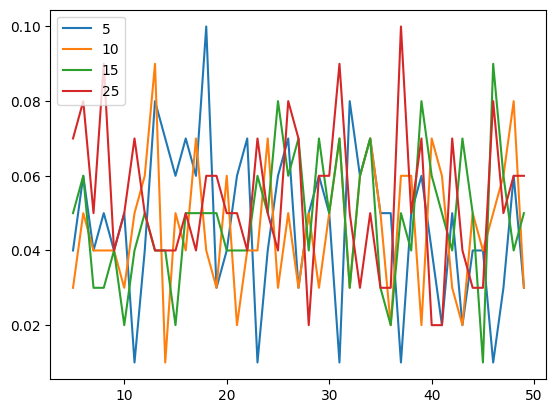

In [3]:
results = pd.DataFrame(columns=["5", "10", "15", "25"])
buf = []

for n in range (5, 50):
    for i in range (0, 100):
        for df in [5, 10, 15, 25]:
            #generowanie wektora liczbowego z losowymi wartościami z rozkładu t-studenta
            xt = t.rvs(df, size=n)
            
            #test kolmogorova-smirnova
            buf.append(kstest(xt, t(df).cdf)[1] < .05)

    results.loc[n] = [np.mean(buf[0::4]), np.mean(buf[1::4]), np.mean(buf[2::4]), np.mean(buf[3::4])]
    buf.clear()
results.plot()

Dla każdej liczby stopni swobody oraz dla każdej liczby obserwacji odsetek odrzuceń prawdziwej hipotezy zerowej oscyluje w okolicach poziomu istotności, co oznacza, że dla tych danych test może być uznany za rzetelny.

a2) test Kołmogorowa z wykorzystaniem PIT

<Axes: >

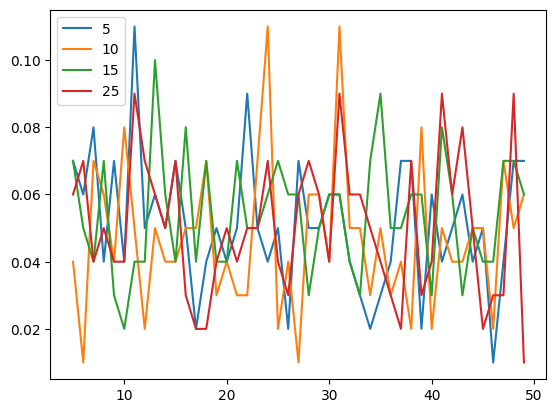

In [4]:
results = pd.DataFrame(columns=["5", "10", "15", "25"])
buf = []

for n in range (5, 50):
    for i in range (0, 100):
        for df in [5, 10, 15, 25]:
            #generowanie wektora liczbowego z losowymi wartościami z rozkładu t-studenta
            xt = t.rvs(df, size=n)

            #przekształcenie PIT
            xt = t(df).cdf(xt)
            
            #test kolmogorova-smirnova
            buf.append(kstest(xt, uniform.cdf)[1] < .05)

    results.loc[n] = [np.mean(buf[0::4]), np.mean(buf[1::4]), np.mean(buf[2::4]), np.mean(buf[3::4])]
    buf.clear()
results.plot()

Tak samo jak w przypadku poprzedniego podpunktu, z obliczeń wynika, że jest jest bardzo dobry.

b) test chi kwadrat

<Axes: >

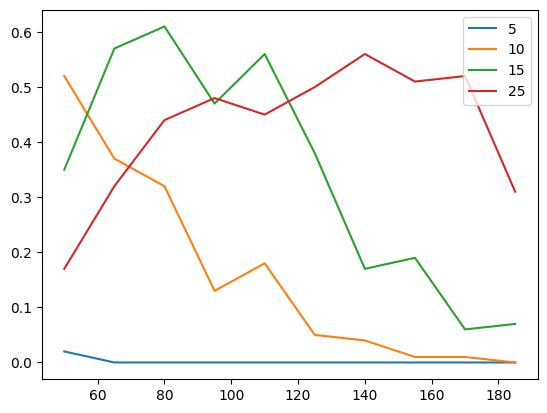

In [5]:
results = pd.DataFrame(columns=["5", "10", "15", "25"])
buf = []

for n in range (50, 200, 15):
    for i in range (0, 100):
        for m in [5, 10, 15, 25]:
            #generowanie dwóch wektorów liczbowych:
            #  - regularnego, oddającego kształt rozkładu chi-kwadrat o długości 15 i m stopniach swobody
            x = np.histogram(np.random.standard_t(n, m), bins=round(math.sqrt(n)))[0]
            xdf = np.histogram(np.random.standard_t(n, m), bins=round(math.sqrt(n)))[0]

            
            x = x / np.sum(x)
            xdf = xdf / np.sum(xdf)
            
            #testy
            buf.append(chisquare(x, xdf)[1] < .05)

    results.loc[n] = [np.mean(buf[0::4]), np.mean(buf[1::4]), np.mean(buf[2::4]), np.mean(buf[3::4])]
    buf.clear()
results.plot()

b2) test chi kwadrat z wykorzystaniem PIT

<Axes: >

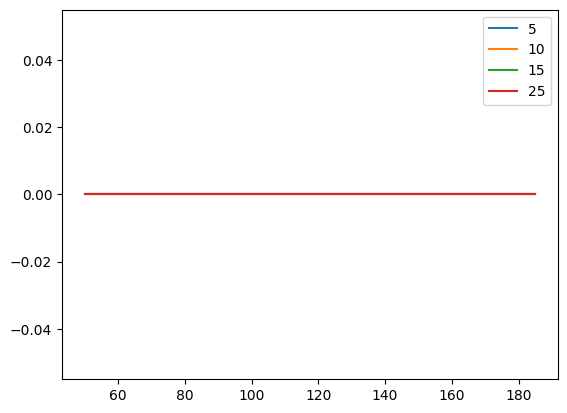

In [7]:
results = pd.DataFrame(columns=["5", "10", "15", "25"])
buf = []

for n in range (50, 200, 15):
    for i in range (0, 100):
        for m in [5, 10, 15, 25]:
            #generowanie dwóch wektorów liczbowych:
            #  - regularnego, oddającego kształt rozkładu chi-kwadrat o długości 15 i m stopniach swobody
            x = np.histogram(t.cdf(np.random.standard_t(m, n), m), bins=round(math.sqrt(n)))[0]

            x = x / np.sum(x)
            
            #testy
            buf.append(chisquare(x)[1] < .05)

    results.loc[n] = [np.mean(buf[0::4]), np.mean(buf[1::4]), np.mean(buf[2::4]), np.mean(buf[3::4])]
    buf.clear()
results.plot()